# Computation of the energy of the wavelet coefficients



In [17]:
import pywt # pip install pywavelets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

WAVELET = 'bior3.5' #'db5'
K=2 #level

frameb = np.zeros((64,64))
coeffs = np.array(frameb)
coeffs[32,32] = 255

def Energy(frame):
    image = pywt.idwt2(frame, WAVELET, mode='per')
    plt.figure()
    plt.imshow(image)

    e = np.sum(image*image)
    return e


### Calculating Energy HH

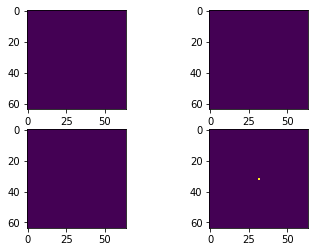

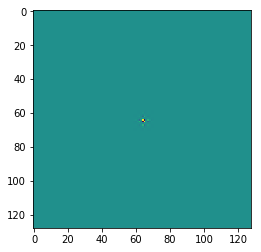

In [18]:
LL=frameb
LH=frameb
HL=frameb
HH=coeffs

plt.figure()

plt.subplot(2, 2, 1) # (rows, columns, panel number)
plt.imshow(LL)

plt.subplot(2, 2, 2)
plt.imshow(LH)

plt.subplot(2,2,3)
plt.imshow(HL)

plt.subplot(2,2,4)
plt.imshow(HH)

energyHH = Energy((LL,(LH,HL,HH)))

### Calculating Energy HL

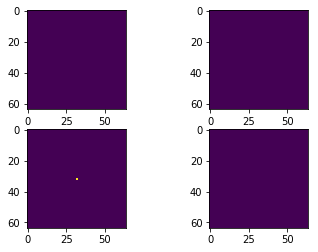

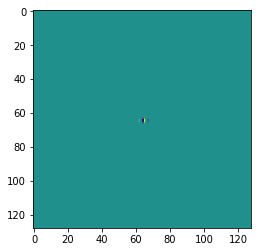

In [19]:
LL=frameb
LH=frameb
HL=coeffs
HH=frameb

plt.figure()

plt.subplot(2, 2, 1) # (rows, columns, panel number)
plt.imshow(LL)

plt.subplot(2, 2, 2)
plt.imshow(LH)

plt.subplot(2,2,3)
plt.imshow(HL)

plt.subplot(2,2,4)
plt.imshow(HH)

energyHL = Energy((LL,(LH,HL,HH)))

### Calculating Energy LH

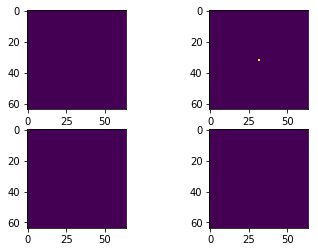

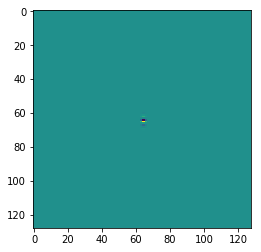

In [20]:
LL=frameb
LH=coeffs
HL=frameb
HH=frameb

plt.figure()

plt.subplot(2, 2, 1) # (rows, columns, panel number)
plt.imshow(LL)

plt.subplot(2, 2, 2)
plt.imshow(LH)

plt.subplot(2,2,3)
plt.imshow(HL)

plt.subplot(2,2,4)
plt.imshow(HH)

energyLH = Energy((LL,(LH,HL,HH)))

### Calculating Energy LL

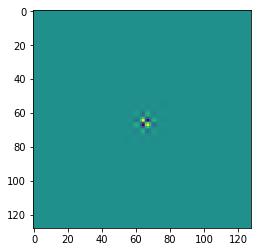

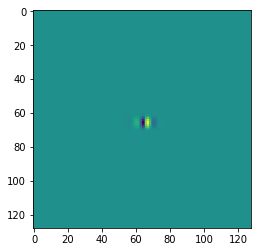

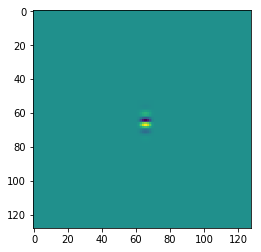

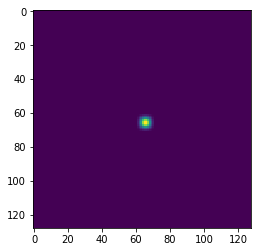

In [21]:
if K == 1: 
    LL=coeffs
    LH=frameb
    HL=frameb
    HH=frameb

    plt.figure()

    plt.subplot(2, 2, 1) # (rows, columns, panel number)
    plt.imshow(LL)

    plt.subplot(2, 2, 2)
    plt.imshow(LH)

    plt.subplot(2,2,3)
    plt.imshow(HL)

    plt.subplot(2,2,4)
    plt.imshow(HH)

    energyLL = Energy((LL,(LH,HL,HH)))
elif K==2:
    LH=frameb
    HL=frameb
    HH=frameb
    
    frameb2 = np.zeros((32,32))
    coeffs2 = np.array(frameb2)
    coeffs2[16,16] = 255
    
    LL2=frameb2
    LH2=frameb2
    HL2=frameb2
    HH2=coeffs2
    
    imageHH2 = pywt.idwt2((LL2,(LH2,HL2,HH2)), WAVELET, mode='per')
    energyHH2 = Energy((imageHH2,(LH,HL,HH)))
    
    LL2=frameb2
    LH2=frameb2
    HL2=coeffs2
    HH2=frameb2
    
    imageHL2 = pywt.idwt2((LL2,(LH2,HL2,HH2)), WAVELET, mode='per')
    energyHL2 = Energy((imageHL2,(LH,HL,HH)))
    
    LL2=frameb2
    LH2=coeffs2
    HL2=frameb2
    HH2=frameb2
    
    imageLH2 = pywt.idwt2((LL2,(LH2,HL2,HH2)), WAVELET, mode='per')
    energyLH2 = Energy((imageLH2,(LH,HL,HH)))
    
    LL2=coeffs2
    LH2=frameb2
    HL2=frameb2
    HH2=frameb2
    
    imageLL2 = pywt.idwt2((LL2,(LH2,HL2,HH2)), WAVELET, mode='per')
    energyLL2 = Energy((imageLL2,(LH,HL,HH)))
    
    

### Calculating Subband gains

In [22]:
gainHH = energyHH/energyHH
gainHL = energyHL/energyHH
gainLH = energyLH/energyHH
if K==1:
    gainLL = energyLL/energyHH
    print("Energy HH, HL, LH, LL")
    print(energyHH, energyHL, energyLH, energyLL)
    print("gainHH=",gainHH)
    print("gainHL=",gainHL)
    print("gainLH=",gainLH)
    print("gainLL=", gainLL)
elif K==2:
    gainHH2 = energyHH2/energyHH2
    gainHL2 = energyHL2/energyHH2
    gainLH2 = energyLH2/energyHH2
    gainLL2 = energyLL2/energyHH2
    print("Energy HH, HL, LH, LL")
    print(energyHH, energyHL, energyLH, energyLL)
    print("Energy HH2, HL2, LH2, LL2")
    print(energyHH2, energyHL2, energyLH2, energyLL2)
    print("gainHL=",gainHL)
    print("gainLH=",gainLH)
    print("gainHL2=", gainHL2)
    print("gainLH2=", gainLH2)
    print("gainLL2=", gainLL2)
    

Energy HH, HL, LH, LL
268598.0560258962 82598.39916229248 82598.39916229248 25400.390624999993
Energy HH2, HL2, LH2, LL2
60774.54346270031 35606.482277624295 35606.482277624295 20861.06300354003
gainHL= 0.30751674224451186
gainLH= 0.30751674224451186
gainHL2= 0.5858782353416998
gainLH2= 0.5858782353416998
gainLL2= 0.3432533066471042
